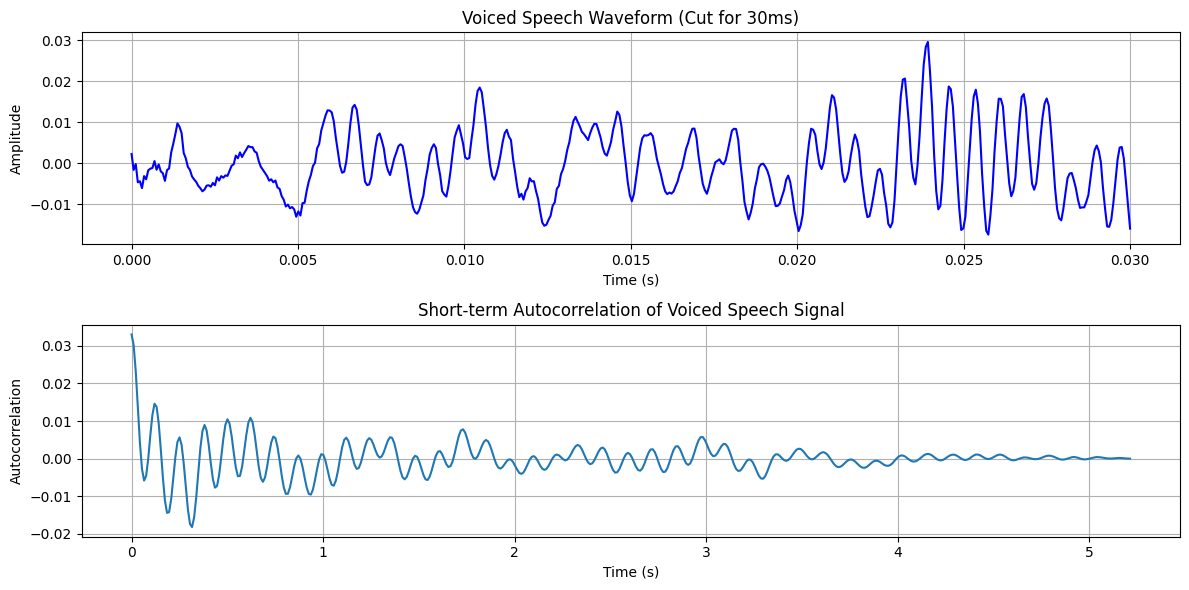

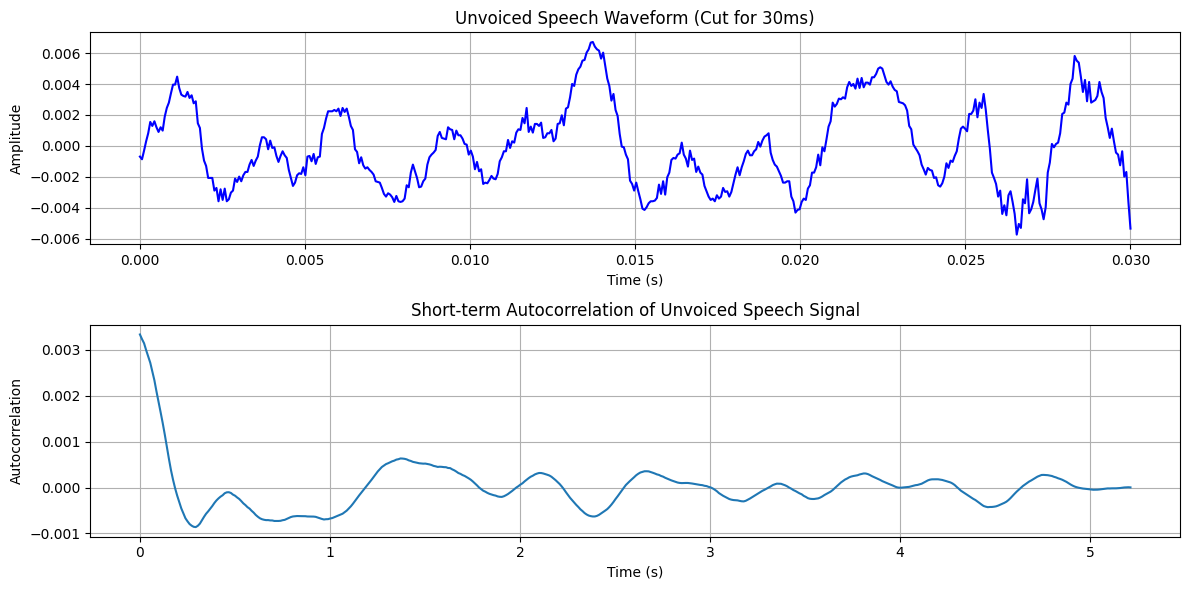

In [2]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio, display

# Function to compute short-term autocorrelation and visualize speech waveform
def compute_short_term_autocorrelation(cut_signal, sr, frame_length, hop_length, signal_type):
    # Compute short-term autocorrelation
    auto_corr = librosa.autocorrelate(y=cut_signal, max_size=frame_length)
    
    # Plot speech waveform and autocorrelation
    plt.figure(figsize=(12, 6))
    
    # Plot speech waveform
    plt.subplot(2, 1, 1)
    plt.plot(np.linspace(0, len(cut_signal) / sr, len(cut_signal)), cut_signal, color='blue')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(signal_type + ' Speech Waveform (Cut for 30ms)')
    plt.grid(True)
    
    # Plot autocorrelation
    plt.subplot(2, 1, 2)
    plt.plot(librosa.frames_to_time(range(len(auto_corr)), hop_length=hop_length), auto_corr)
    plt.xlabel('Time (s)')
    plt.ylabel('Autocorrelation')
    plt.title('Short-term Autocorrelation of ' + signal_type + ' Speech Signal')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Load the audio file
audio_file = "test.wav"
signal, sr = librosa.load(audio_file, sr=None)

# Parameters
frame_duration = 0.03  # 30 ms frame duration
hop_duration = frame_duration / 2  # Half of frame duration for 50% overlap

# Convert durations to samples
frame_length = int(sr * frame_duration)
hop_length = int(sr * hop_duration)

# Cut a portion of the speech signal (for example, for 30 ms)
cut_signal = signal[int(5*sr):int(5.03*sr)]
compute_short_term_autocorrelation(cut_signal, sr, frame_length, hop_length, 'Voiced')

# Cut a portion of the speech signal (for example, for 30 ms)
cut_signal = signal[int(4*sr):int(4.03*sr)]
compute_short_term_autocorrelation(cut_signal, sr, frame_length, hop_length, 'Unvoiced')
